## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [1]:
import pandas as pd
import pyarrow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
var_list = ['year', 'sex', 'race', 'age', 'educ', 'income','happy', 'partyid', 'relig'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to

phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

**2. Write a short description of the data you chose, and why. (1 page)**

For this lab, I wanted to look at how certain aspects of a person’s identity or life correlated with their political party affiliation. The variables I decided on are year, age, sex, religion, happiness, income, education, race, and partyid.

I chose the year and age variables to analyze trends in political party affiliation over time and generations. The data spans from 1972 to 2022, with a mean survey year of 1997. The respondent’s ages range from 18 to 89, with an average age of 46.6. I used the sex and race variables to look at political affiliation by gender and race. Females are the most common respondents, making up 40,301 of the 72,390 total respondents. The majority of respondents identify as white, with three other racial categories represented. This indicates that the dataset is heavily skewed toward white respondents. The religion variable looks at the relationship between religious preference and political party. The most common religion in the dataset is Christianity (41,301 respondents). The dataset includes a diverse set of religions but is still predominantly Christian. The happy variable to see overall happiness levels in each political party. The most common self-reported happiness level is “happy.” The education variable showed years of education, and I looked at how this correlates with income and political party. Education ranges from 0 to 20 years, with a median of 12 years (high school completion). 75% of respondents had 16 years or fewer of education. The median reported income is $25,000, ranging from $500 to $25,000, indicating that a majority reported $25,000. The largest political party affiliation is Democrat (34,813 respondents). However, the dataset also includes independents, republicans, and those who identify with other parties.


**3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook or markdown chunks explaining your choices.**



In [28]:
# Load data using Pandas
df = pd.read_csv('selected_gss_data.csv')

# View first 5 rows
df.head()

,year,sex,race,age,educ,income,happy,partyid,relig
0,1972,female,white,23.0,16.0,NaN,not too happy,"independent, close to democrat",jewish
1,1972,male,white,70.0,10.0,NaN,not too happy,not very strong democrat,catholic
2,1972,female,white,48.0,12.0,NaN,pretty happy,"independent (neither, no response)",protestant
3,1972,female,white,27.0,17.0,NaN,not too happy,not very strong democrat,other
4,1972,female,white,61.0,12.0,NaN,pretty happy,strong democrat,protestant


In [29]:
print('Before Cleaning:')
print(df.info())
print(df.isnull().sum())

Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     72390 non-null  int64  
 1   sex      72278 non-null  object 
 2   race     72283 non-null  object 
 3   age      71621 non-null  float64
 4   educ     72127 non-null  float64
 5   income   63439 non-null  object 
 6   happy    67588 non-null  object 
 7   partyid  71905 non-null  object 
 8   relig    71953 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.0+ MB
None
year          0
sex         112
race        107
age         769
educ        263
income     8951
happy      4802
partyid     485
relig       437
dtype: int64


> **Cleaning the 'Sex' Variable**

In [33]:
# Display unique values before cleaning
print("Unique values before cleaning:\n", df['sex'].unique())

Unique values before cleaning:
 ['female', 'male', 'unknown']
Categories (3, object): ['female', 'male', 'unknown']


In [34]:
# Fill in missing values with unknown
df['sex'] = df['sex'].fillna('unknown')

# Convert to a categorical variable from an object
df['sex'] = df['sex'].astype('category')

# Display unique values after cleaning
print("Unique values after cleaning:\n", df['sex'].unique())

Unique values after cleaning:
 ['female', 'male', 'unknown']
Categories (3, object): ['female', 'male', 'unknown']


> **Cleaning the 'race' Variable**

In [35]:
# Display unique values before cleaning
print("Unique values before cleaning:\n", df['race'].unique())

Unique values before cleaning:
 ['white' 'black' 'other' nan]


In [36]:
# Fill in missing values with unknown
df['race'] = df['race'].fillna('unknown')

# Convert to a categorical variable from an object
df['race'] = df['race'].astype('category')

# Display unique values after cleaning
print("Unique values after cleaning:\n", df['race'].unique())

Unique values after cleaning:
 ['white', 'black', 'other', 'unknown']
Categories (4, object): ['black', 'other', 'unknown', 'white']


> **Cleaning the 'income' Variable**

In [37]:
# Display unique values before cleaning
print("Unique values before cleaning:\n", df['income'].unique())

Unique values before cleaning:
 [nan '$10,000 to $14,999' '$7,000 to $7,999' '$4,000 to $4,999'
 '$1,000 to $2,999' '$15,000 to $19,999' '$5,000 to $5,999'
 '$20,000 to $24,999' '$3,000 to $3,999' 'under $1,000' '$8,000 to $9,999'
 '$25,000 or more' '$6,000 to $6,999']


In [38]:
# Remove dollar signs and convert income ranges to numeric midpoints
df['income'] = df['income'].replace({
    'under $1,000': 500,
    '$1,000 to $2,999': 2000,
    '$3,000 to $3,999': 3500,
    '$4,000 to $4,999': 4500,
    '$5,000 to $5,999': 5500,
    '$6,000 to $6,999': 6500,
    '$7,000 to $7,999': 7500,
    '$8,000 to $9,999': 9000,
    '$10,000 to $14,999': 12500,
    '$15,000 to $19,999': 17500,
    '$20,000 to $24,999': 22500,
    '$25,000 or more': 25000
})

# Convert to numeric
df['income'] = pd.to_numeric(df['income'], errors = 'coerce')

# Display unique values after cleaning
print("Unique values after cleaning:\n", df['income'].unique())

Unique values after cleaning:
 [   nan 12500.  7500.  4500.  2000. 17500.  5500. 22500.  3500.   500.
  9000. 25000.  6500.]


<ipython-input-38-905da7e27feb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income'] = df['income'].replace({


> **Cleaning the 'happy' Variable**

In [39]:
# Display unique values before cleaning
print("Unique values before cleaning:\n", df['happy'].unique())

Unique values before cleaning:
 ['not too happy' 'pretty happy' 'very happy' nan]


In [40]:
# Replace missing values with unknown
df['happy'] = df['happy'].fillna('unknown')

# Group similar responses into standardized categories
df['happy'] = df['happy'].replace({
    'not too happy':'unhappy',
    'pretty happy':'happy',
})

# Convert to categorical variable
df['happy'] = df['happy'].astype('category')

# Display unique values after cleaning
print("Unique values after cleaning:\n", df['happy'].unique())

Unique values after cleaning:
 ['unhappy', 'happy', 'very happy', 'unknown']
Categories (4, object): ['happy', 'unhappy', 'unknown', 'very happy']


> **Cleaning the 'partyid' Variable**

In [41]:
# Display unique values before cleaning
print("Unique values before cleaning:\n", df['partyid'].unique())

Unique values before cleaning:
 ['independent, close to democrat' 'not very strong democrat'
 'independent (neither, no response)' 'strong democrat'
 'not very strong republican' 'independent, close to republican'
 'strong republican' 'other party' nan]


In [42]:
# Replace missing values with unknown
df['partyid'] = df['partyid'].fillna('unknown')

# Group similar responses into standardized categories
df['partyid'] = df['partyid'].replace({
    'independent, close to democrat':'democrat',
    'not very strong democrat':'democrat',
    'independent (neither, no response)':'independent',
    'strong democrat':'democrat',
    'not very strong republican':'republican',
    'independent, close to republican':'republican',
    'strong republican':'republican',
    'other party':'other'
})

# Convert to categorical variable
df['partyid'] = df['partyid'].astype('category')

# Display unique values after cleaning
print("Unique values after cleaning:\n", df['partyid'].unique())

Unique values after cleaning:
 ['democrat', 'independent', 'republican', 'other', 'unknown']
Categories (5, object): ['democrat', 'independent', 'other', 'republican', 'unknown']


> **Cleaning the 'relig' Variable**

In [43]:
# Display unique values before cleaning
print("Unique values before cleaning:\n", df['relig'].unique())

Unique values before cleaning:
 ['jewish' 'catholic' 'protestant' 'other' 'none' nan
 'inter-nondenominational' 'christian' 'muslim/islam' 'buddhism'
 'orthodox-christian' 'native american' 'hinduism'
 'other eastern religions']


In [44]:
# Replace missing values with unknown
df['relig'] = df['relig'].fillna('unknown')

# Group similar responses into standardized categories
df['relig'] = df['relig'].replace({
    'muslim/islam':'muslim',
    'buddhism':'buddhist',
    'protestant':'christian',
    'catholic':'christian',
    'orthodox-christian':'christian',
    'hinduism':'hindu',
    'other eastern religions':'eastern religion',
    'none':'atheist',
})

# Convert to categorical variable
df['relig'] = df['relig'].astype('category')

# Display unique values after cleaning
print("Unique values after cleaning:\n", df['relig'].unique())

Unique values after cleaning:
 ['jewish', 'christian', 'other', 'atheist', 'unknown', ..., 'muslim', 'buddhist', 'native american', 'hindu', 'eastern religion']
Length: 11
Categories (11, object): ['atheist', 'buddhist', 'christian', 'eastern religion', ..., 'muslim',
                          'native american', 'other', 'unknown']


In [45]:
# Variable Info After Cleaning
print('After Cleaning:')
print(df.info())

After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        72390 non-null  int64   
 1   sex         72390 non-null  category
 2   race        72390 non-null  category
 3   age         71621 non-null  float64 
 4   educ        72127 non-null  float64 
 5   income      63439 non-null  float64 
 6   happy       72390 non-null  category
 7   partyid     72390 non-null  category
 8   relig       72390 non-null  category
 9   educ_group  72127 non-null  category
dtypes: category(6), float64(3), int64(1)
memory usage: 2.6 MB
None


**4. Produce some numeric summaries and visualizations. (Findings under each visualization)**

In [46]:
# Summary statistics for numeric variables
print(df.describe())

               year           age          educ        income
count  72390.000000  71621.000000  72127.000000  63439.000000
mean    1997.715541     46.555982     13.034633  19410.417882
std       15.109995     17.600417      3.182372   7666.852472
min     1972.000000     18.000000      0.000000    500.000000
25%     1985.000000     32.000000     12.000000  12500.000000
50%     1998.000000     44.000000     12.000000  25000.000000
75%     2010.000000     60.000000     16.000000  25000.000000
max     2022.000000     89.000000     20.000000  25000.000000


In [47]:
# Summary statistics for categorical variables
print(df.describe(include = 'category'))

           sex   race  happy   partyid      relig   educ_group
count    72390  72390  72390     72390      72390        72127
unique       3      4      4         5         11            4
top     female  white  happy  democrat  christian  High School
freq     40301  57657  37813     34744      58543        30525


## Visualizations:

<ipython-input-48-7b21f6bb406f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  party_counts = df.groupby(["year", "partyid"]).size().reset_index(name="count")


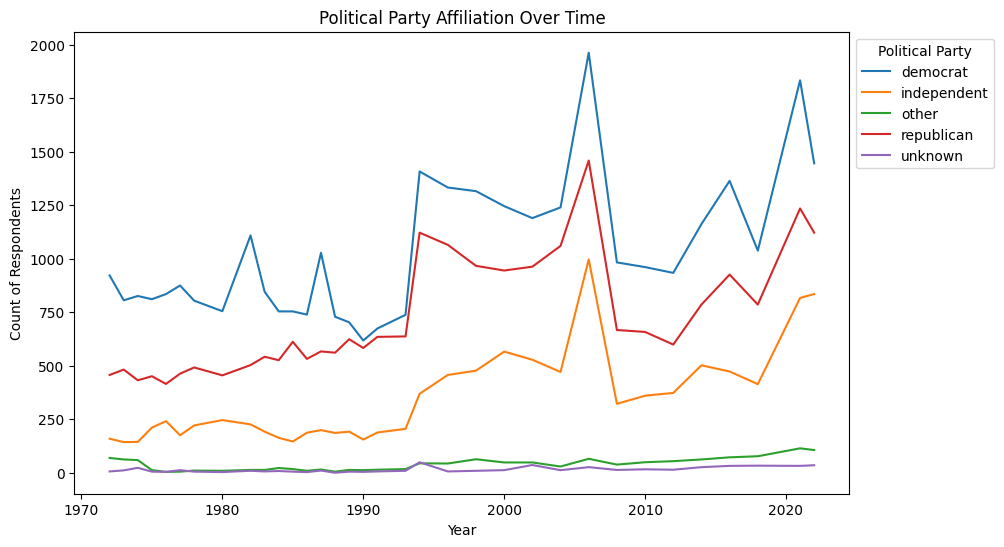

In [48]:
# Lineplot of Political Party Affiliation Over Time

# Count the number of respondents for each political party per year
party_counts = df.groupby(["year", "partyid"]).size().reset_index(name = "count")

# Line plot with separate lines for each political party
plt.figure(figsize=(10,6))
sns.lineplot(data = party_counts, x = "year", y = "count", hue = "partyid")

# Formatting & Labels
plt.title("Political Party Affiliation Over Time")
plt.xlabel("Year")
plt.ylabel("Count of Respondents")
plt.legend(title = "Political Party", bbox_to_anchor = (1,1))
plt.show()

**Findings:**

This line plot shows trends in political affiliation over time, revealing shifts in party preference across decades. This plot clearly shows that Democrats have historically had the most respondents. The red line (republicans) starts significantly lower than the democratic count but follows a similar pattern of peaks and dips, likely reflecting major political events. The orange line (independents) also follows a similar pattern, slowly rising over the decades. Both unknown and other parties remain a very small percentage of respondents throughout the survey.


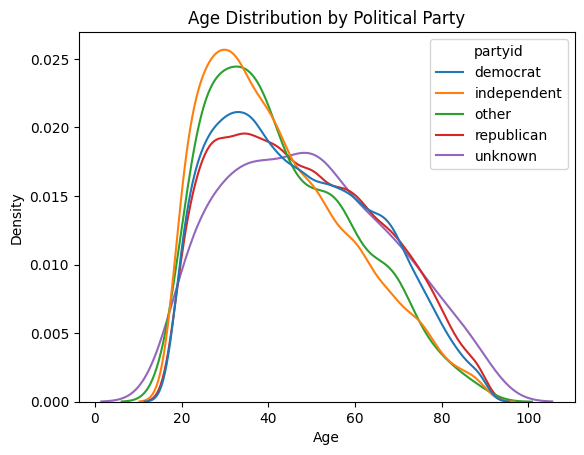

In [49]:
3 # KDE Plot of Age by Political Party
sns.kdeplot(data = df, x = "age", hue = "partyid", common_norm = False).set(title = "Age Distribution by Political Party")

# Formatting & Labels
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

**Findings:**

We can see that Democrats and Republicans have similar age distributions, but there is a slight shift. Republicans (red) appear to have a higher proportion of older individuals than Democrats (blue). Democrats have a slightly higher density of younger individuals, especially in the 20-40 age range. We also see that independents and “other” party members tend to be younger. The green and orange lines peak higher in the 20s-30s range, suggesting that independent voters tend to be younger. This may indicate that younger people are likelier to identify as independent rather than aligning with a major party. Lastly, the purple line is more evenly distributed, meaning people who did not specify (nan values) a party come from a wide age range.

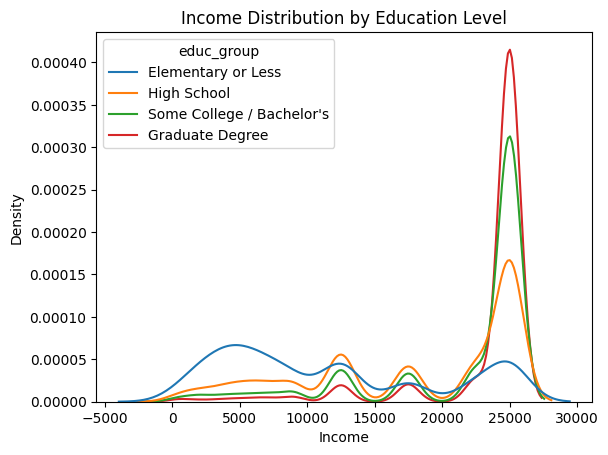

In [50]:
# Create education level bins and labels
bins = [0, 8, 12, 16, 20]
labels = ["Elementary or Less", "High School", "Some College / Bachelor's", "Graduate Degree"]
df['educ_group'] = pd.cut(df['educ'], bins = bins, labels = labels, include_lowest=True) # Creates a new column for educ_group and pd.cut bins the educ years into categorical groups

# KDE Plot of Income by Education Level
sns.kdeplot(data = df, x = "income", hue = "educ_group", common_norm = False).set(title = "Income Distribution by Education Level")

# Formatting & Labels
plt.xlabel("Income")
plt.ylabel("Density")
plt.show()

**Findings:**

The KDE plot of income distribution by education level shows that higher education levels (bachelor’s or graduate degrees) correspond with higher income peaks. While this plot does not directly involve political party affiliation, it suggests that education is strongly associated with income, which is relevant given that political views often correlate with socioeconomic factors. If Democrats or Republicans tend to have a higher percentage of individuals in certain education levels, this could imply an indirect link between income and political party affiliation.


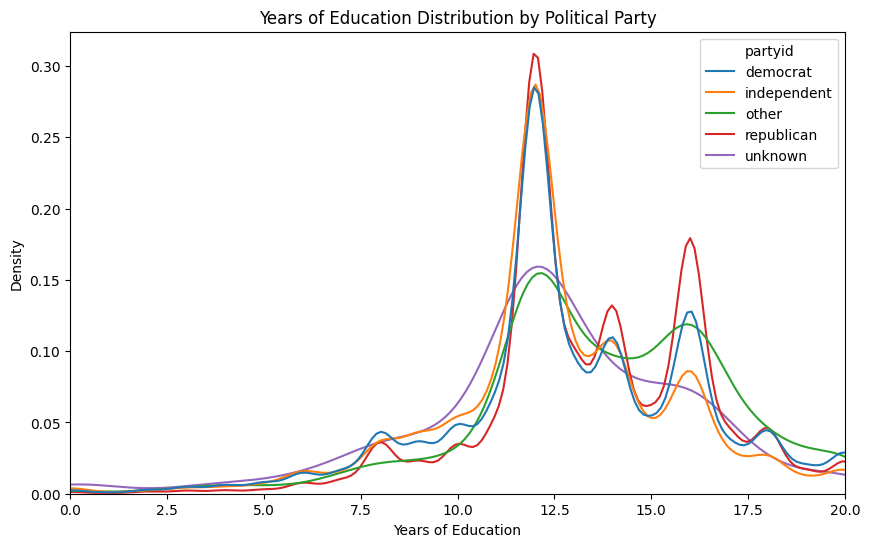

In [51]:
# KDE Plot of Education Level by Political Party
plt.figure(figsize = (10, 6))
sns.kdeplot(data = df, x = "educ", hue = "partyid", common_norm = False).set(title = "Years of Education Distribution by Political Party")

# Formatting & Labels
plt.xlabel("Years of Education")
plt.ylabel("Density")
plt.xlim(0, 20)
plt.show()

**Findings:**

The next KDE plot of years of education by political party shows distinct distributions for different parties. Democrats and independents have peaks near 12-13 years (high school level) and 16 years (college graduates). Republicans show a slightly stronger presence around 12 years, but also have a peak in higher education. These peaks around 12-13 years are not extremely meaningful since this is around the age when you can vote in the US (18 years old), but they are still interesting to look at. While all parties have similar distributions in terms of peaks, education level does seem to vary slightly between political affiliations. This could suggest that education plays a role in political alignment, with potential differences in political beliefs emerging from educational backgrounds.

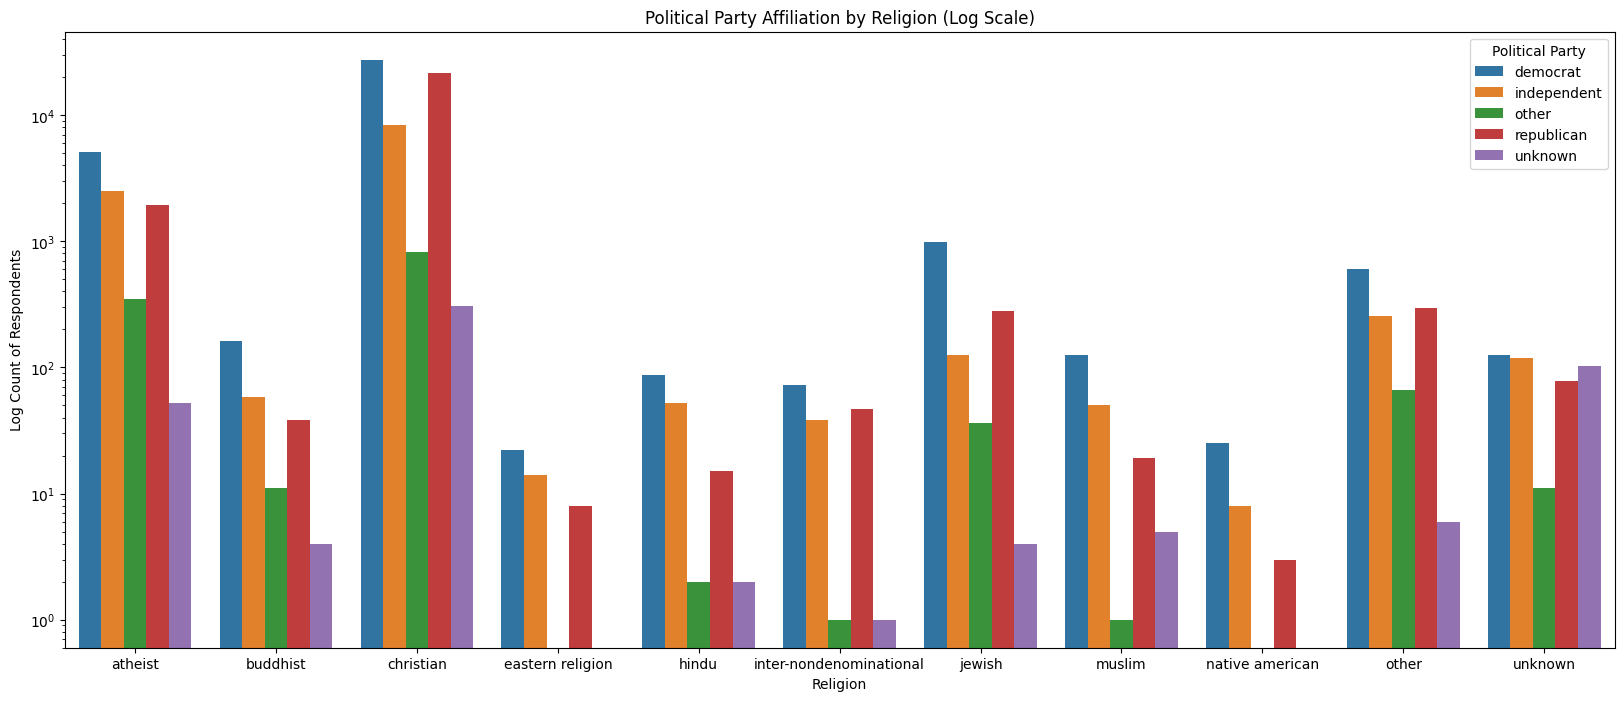

In [52]:
# Bar Chart of Political Party Affiliation by Religion (Log Scale)
plt.figure(figsize=(20,8))
sns.countplot(dat = df, x = "relig", hue = "partyid")
plt.yscale("log")  # Apply log scale to y-axis

# Formatting & Labels
plt.title("Political Party Affiliation by Religion (Log Scale)")
plt.xlabel("Religion")
plt.ylabel("Log Count of Respondents")
plt.legend(title = "Political Party", bbox_to_anchor = (1,1))
plt.show()

**Findings:**

This bar chart visualizes the distribution of political party affiliation across different religious groups. The log scale is applied to the y-axis to better represent the wide range of values, as some religious groups have significantly more respondents than others. A linear scale would make smaller groups nearly invisible due to the large difference in counts. Key trends I see are that Christians have a fairly even split between democrats and republicans, while atheist Jewish respondents are significantly more democratic. Muslims, Buddhists, Hindus, and Atheists all lean more democratic as well. Overall, religious affiliation appears to correlate with political parties. Republicans are more heavily concentrated among Christians, while Democrats dominate among other religions and non-religious groups.


In [132]:
# Find Proportions of Democrats and Republics Happiness Levels
df_filtered = df[df["partyid"].isin(["democrat", "republican", "independent"])]

# Group by political party and happiness level
happiness_proportions = df_filtered.groupby("partyid")["happy"].value_counts(normalize=True)
happiness_proportions = happiness_proportions.unstack()
print(happiness_proportions)

happy           happy   unhappy   unknown  very happy
partyid                                              
democrat     0.537503  0.142068  0.059665    0.260764
independent  0.513258  0.154333  0.085269    0.247140
other        0.000000  0.000000  0.000000    0.000000
republican   0.506926  0.097743  0.066217    0.329113
unknown      0.000000  0.000000  0.000000    0.000000


<ipython-input-132-01bf6c6d5c3f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  happiness_proportions = df_filtered.groupby("partyid")["happy"].value_counts(normalize=True)


**Findings:**

This table shows the proportion of individuals within each political party who fall into different happiness categories (happy, unhappy, unknown, very happy). Across all 3 political parties (democrats, republicans, independents), the largest portion of people describe themselves as “happy” rather than “very happy” or “unhappy”. Republicans have the highest proportion of “very happy” respondents, with democrats following. Democrats and independents have higher unhappy proportions. This suggests that dissatisfaction levels are slightly higher among Democrats and Independents.

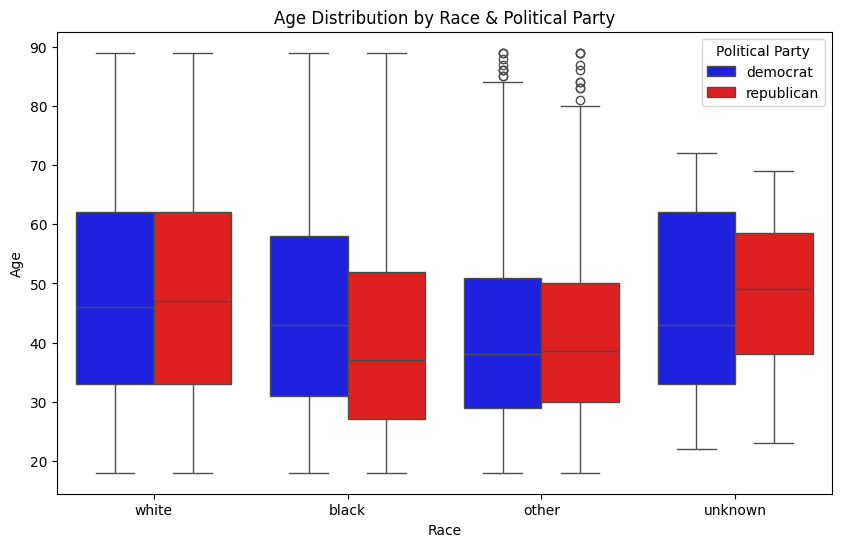

In [120]:
# Only show democrat and republican & filter work status
df_filtered = df[df['partyid'].isin(['democrat', 'republican'])]

# Define work status order
race_order = ["white", "black", "other", "unknown"]

# Box Plot of Work Status by Year & Political Party
plt.figure(figsize=(10,6))
sns.boxplot(data = df_filtered, x = "race", y = "age", hue = "partyid", hue_order = ['democrat', 'republican'], palette = {"democrat": "blue", "republican": "red"}, order = race_order)

# Formatting & Labels
plt.title("Age Distribution by Race & Political Party")
plt.xlabel("Race")
plt.ylabel("Age")
plt.legend(title = "Political Party", bbox_to_anchor=(1,1))
plt.show()

**Findings:**

This box plot shows age distribution by race and political party. Across all racial groups, the median age for Democrats and Republicans appears fairly similar, typically between 40-50 years old. The black category has a lower median age compared to the white and other groups. The white category has a higher proportion of older respondents, with more individuals reaching the upper quartiles (above 60 years old). There doesn’t appear to be a big difference in age distribution between Democrats and Republicans within each racial group. However, black Democrats do seem to be slightly older than Republicans.


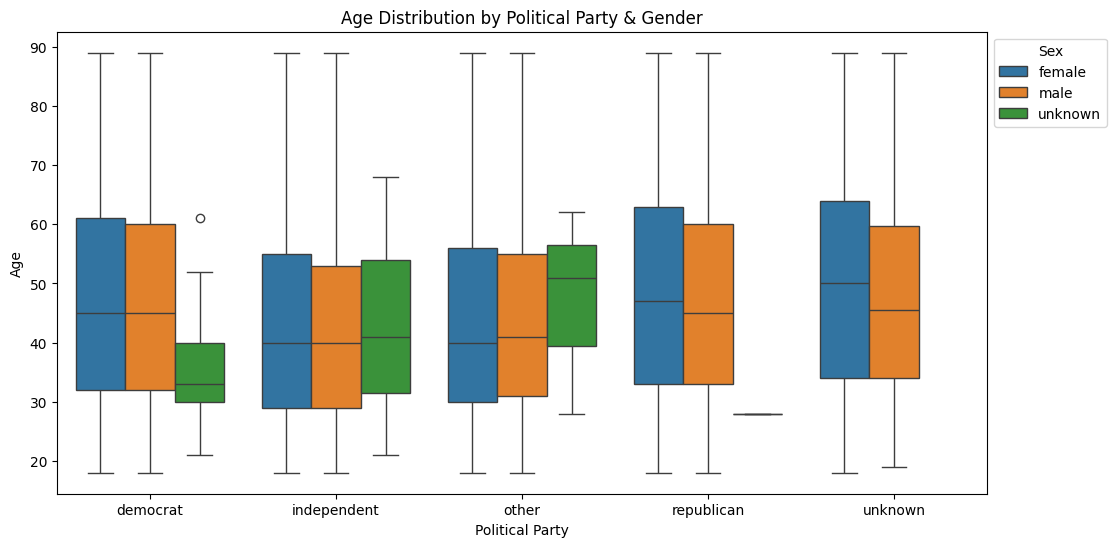

In [121]:
# Grouped Box Plot of Age Distribution by Political Party & Gender
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = "partyid", y = "age", hu = "sex")

# Formatting & Labels
plt.title("Age Distribution by Political Party & Gender")
plt.xlabel("Political Party")
plt.ylabel("Age")
plt.legend(title = "Sex", bbox_to_anchor=(1,1))
plt.show()

**Findings:**

This boxplot visualizes the age distribution within each political party, separated by gender. The median age appears to be slightly higher for Republicans compared to Democrats and independents. The age distribution for all parties is fairly wide, with respondents ranging from their early 20s to late 80s. The age distributions for males and females are similar within each party, suggesting that political affiliation is not strongly correlated with age differences between genders. However, for Republicans, the median age for females is slightly higher than for males. Overall, this plot shows that age may be a stronger factor in predicting political parties than gender alone, which I would not expect.